In [1]:
#--- Import Pandas ---
import pandas as pd
#--- Read in dataset(heart_cleveland_upload.csv) ----
df = pd.read_csv('Data/heart_cleveland_upload.csv')
#--- Inspect data ---
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


Identifying Null Values

In [2]:
# --- WRITE YOUR CODE FOR MODULE 1 TASK 2 ---

sumofnull = df.isnull().sum()

#--- Inspect data ---
sumofnull

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Examining Data Types

In [3]:
datatype = df.dtypes
datatype

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

Identifying Numerical and Categorical Features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','condition']
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal' ]
numeric_features
cat_features

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

Converting Features to Categorical Data Types

In [6]:
#lst = ['cat_features']

for col in cat_features:
    df[col] = df[col].astype(object)

# df_subset = df[lst]
# df_subset = df_subset.astype(object)
# df.update(df_subset)
dtype = df.dtypes

In [7]:
dtype

age            int64
sex           object
cp            object
trestbps       int64
chol           int64
fbs           object
restecg       object
thalach        int64
exang         object
oldpeak      float64
slope         object
ca            object
thal          object
condition      int64
dtype: object

Exploring Feature Correlations

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

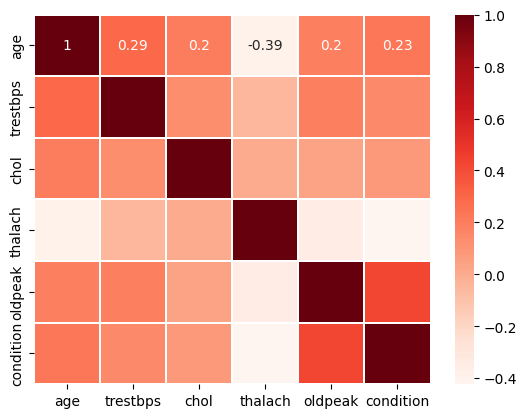

In [9]:
# Select the numeric features for correlation analysis
corr_data = df[numeric_features].corr()

# Create the heatmap
sns.heatmap(corr_data, annot=True, cmap='Reds', linewidths=0.1)

# Display the heatmap (optional)
plt.show()

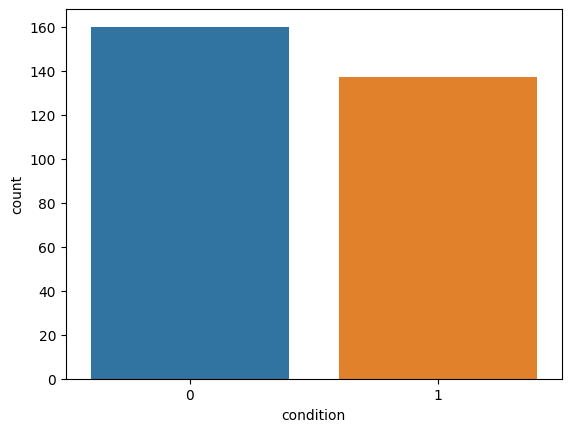

In [10]:
# Create the countplot for the 'condition' column
condition_ax = sns.countplot(x=df["condition"])
# Display the countplot
plt.show()

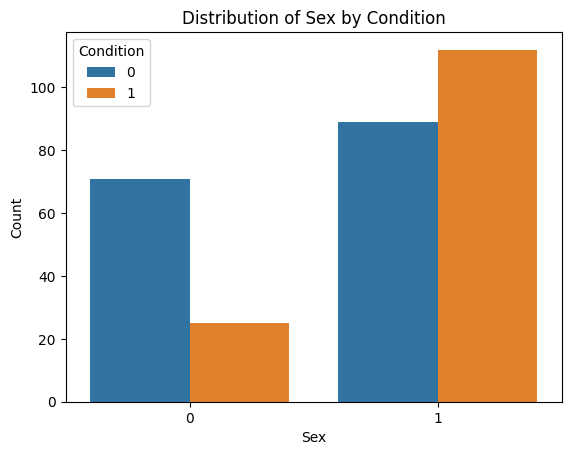

In [11]:
# Create a countplot with hue
sex_ax = sns.countplot(x=df["sex"], hue=df['condition'])

# Customize the plot (optional)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Sex by Condition")
plt.legend(title="Condition")

# Display the countplot
plt.show()

Examining Chest Pain Types and Health Conditions

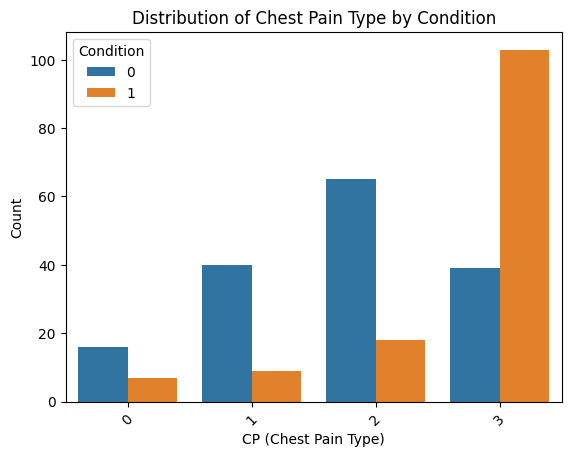

In [12]:
# Create a countplot with hue
cp_ax = sns.countplot(x=df["cp"], hue=df['condition'])

# Customize the plot
plt.xlabel("CP (Chest Pain Type)")  
plt.ylabel("Count")
plt.title("Distribution of Chest Pain Type by Condition")
plt.legend(title="Condition")
plt.xticks(rotation=45) 
# Display the countplot
plt.show()

Investigating Fasting Blood Sugar Levels and Health Conditions

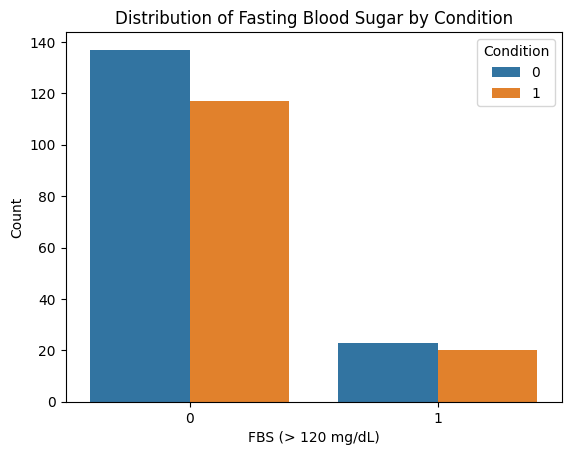

In [13]:
fbs_ax = sns.countplot(x=df["fbs"], hue=df['condition'])

plt.xlabel("FBS (> 120 mg/dL)") 
plt.ylabel("Count")
plt.title("Distribution of Fasting Blood Sugar by Condition")
plt.legend(title="Condition")

# Display the countplot
plt.show()

Analyzing Resting Electrocardiographic Results and Health Conditions

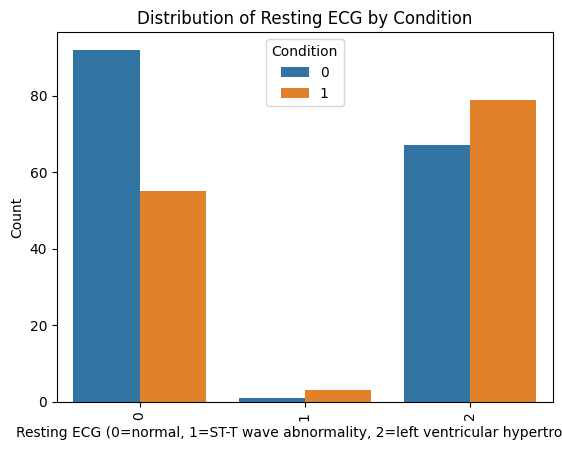

In [15]:
restecg_ax = sns.countplot(x=df["restecg"], hue=df['condition'])

plt.xlabel("Resting ECG (0=normal, 1=ST-T wave abnormality, 2=left ventricular hypertrophy)")  # Informative label for 'restecg'
plt.ylabel("Count")
plt.title("Distribution of Resting ECG by Condition")
plt.legend(title="Condition")
plt.xticks(rotation=90) 

# Display the countplot
plt.show()

Examining Exercise-Induced Angina and Health Conditions

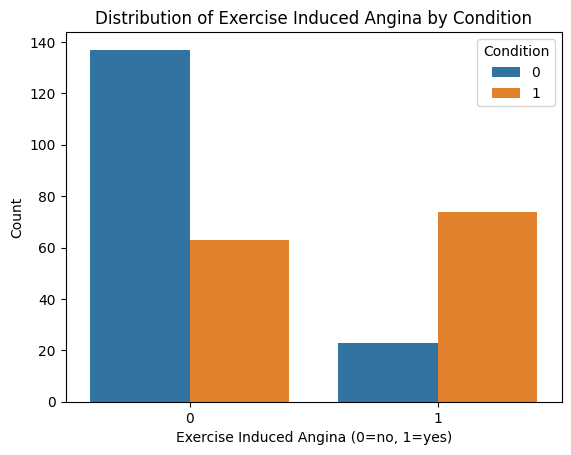

In [16]:
exang_ax = sns.countplot(x=df["exang"], hue=df['condition'])


plt.xlabel("Exercise Induced Angina (0=no, 1=yes)")  
plt.ylabel("Count")
plt.title("Distribution of Exercise Induced Angina by Condition")
plt.legend(title="Condition")

# Display the countplot
plt.show()

Investigating the Slope of the ST Segment and Health Conditions

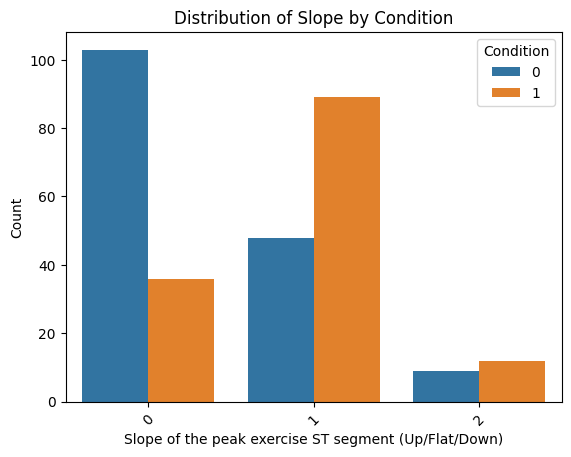

In [17]:
# Create a countplot with hue
slope_ax = sns.countplot(x=df["slope"], hue=df['condition'])

plt.xlabel("Slope of the peak exercise ST segment (Up/Flat/Down)") 
plt.ylabel("Count")
plt.title("Distribution of Slope by Condition")
plt.legend(title="Condition")
plt.xticks(rotation=45) 

# Display the countplot
plt.show()

Analyzing the Number of Major Vessels Colored by Fluoroscopy and Health Conditions

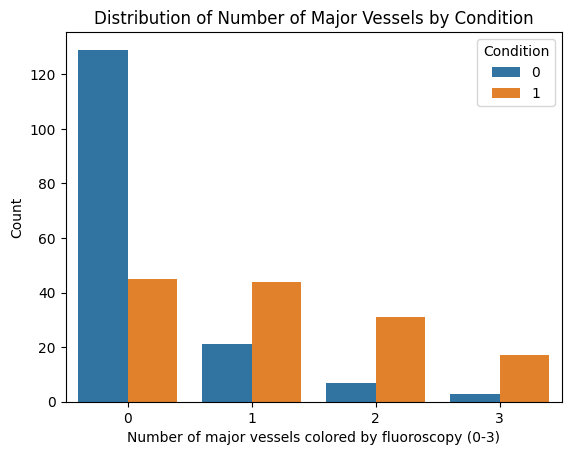

In [18]:
ca_ax = sns.countplot(x=df["ca"], hue=df['condition'])

plt.xlabel("Number of major vessels colored by fluoroscopy (0-3)")  
plt.ylabel("Count")
plt.title("Distribution of Number of Major Vessels by Condition")
plt.legend(title="Condition")

# Display the countplot
plt.show()

Examining Thalassemia and Health Conditions

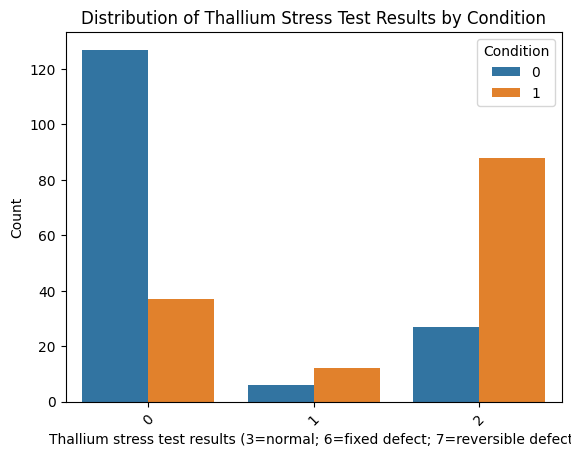

In [19]:
# Create a countplot with hue
thal_ax = sns.countplot(x=df["thal"], hue=df['condition'])

plt.xlabel("Thallium stress test results (3=normal; 6=fixed defect; 7=reversible defect)") 
plt.ylabel("Count")
plt.title("Distribution of Thallium Stress Test Results by Condition")
plt.legend(title="Condition")
plt.xticks(rotation=45) 
# Display the countplot
plt.show()

Visualizing Age Distribution

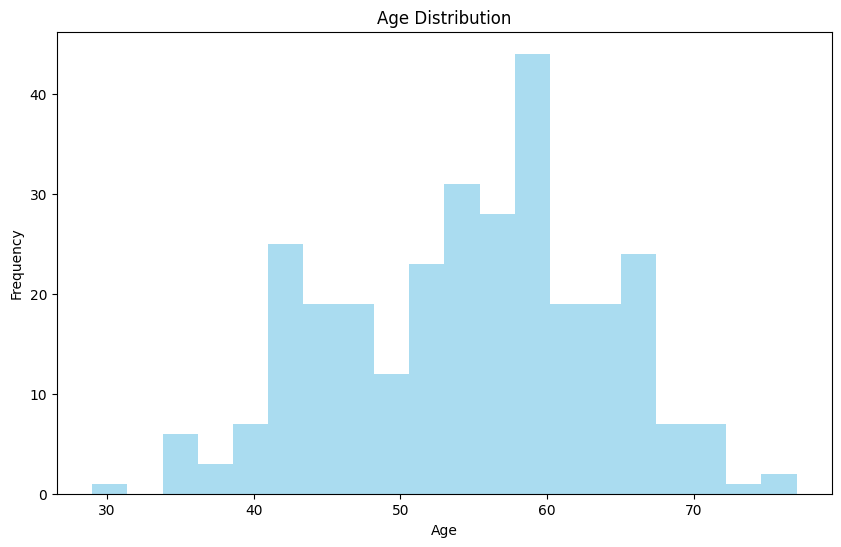

In [20]:
# Extract the 'age' column
age_col = df['age']

# Create a figure with specific size
plt.figure(figsize=(10, 6))

# Generate the histogram
plt.hist(age_col, bins=20, color='skyblue', alpha=0.7)

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Display the histogram
plt.show()


Visualizing Resting Blood Pressure Distribution

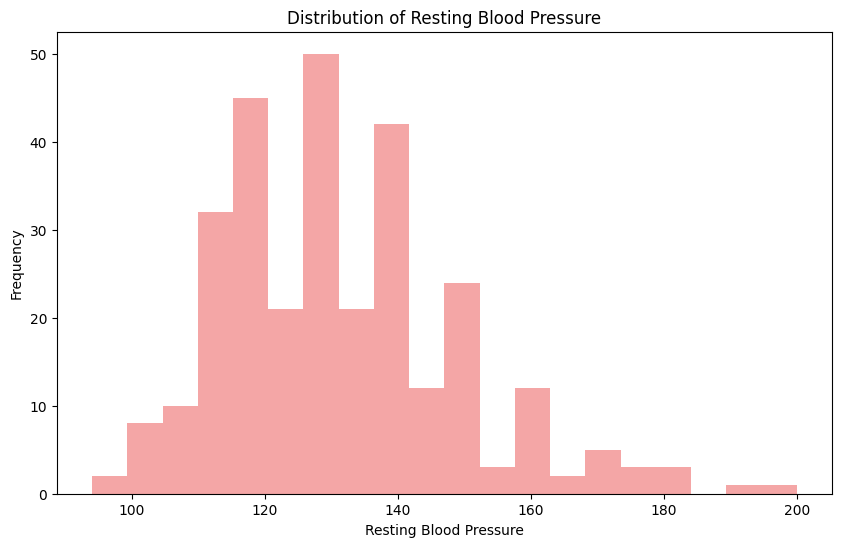

In [21]:
# Extract the 'trestbps' column
trestbps_col = df['trestbps']

# Create a figure with specific size
plt.figure(figsize=(10, 6))

# Generate the histogram
plt.hist(trestbps_col, bins=20, color='lightcoral', alpha=0.7)

# Set labels and title
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.title('Distribution of Resting Blood Pressure')

# Display the histogram
plt.show()

Visualizing Cholesterol Distribution

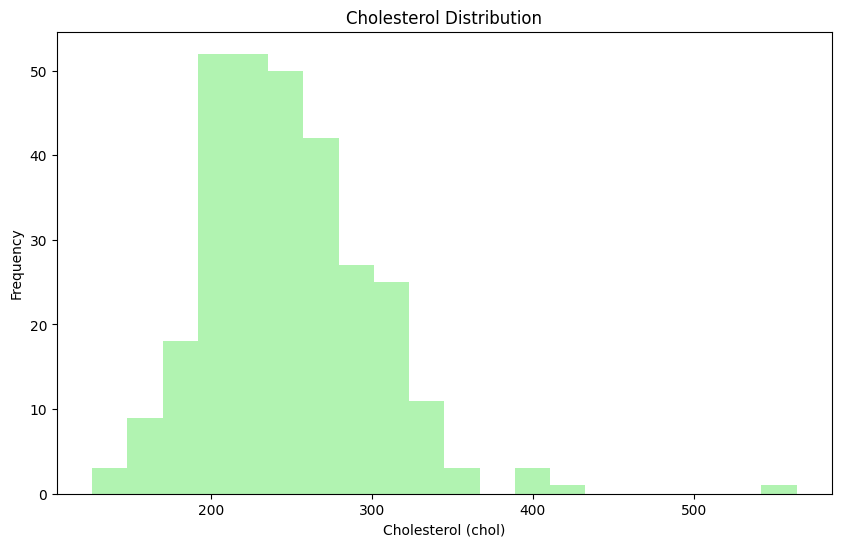

In [22]:
# Extract the 'chol' column
chol_col = df['chol']

# Create a figure with specific size
plt.figure(figsize=(10, 6))

# Generate the histogram
plt.hist(chol_col, bins=20, color='lightgreen', alpha=0.7)

# Set labels and title
plt.xlabel('Cholesterol (chol)')  # Informative label for chol
plt.ylabel('Frequency')
plt.title('Cholesterol Distribution')

# Display the histogram
plt.show()

Visualizing Maximum Heart Rate Distribution

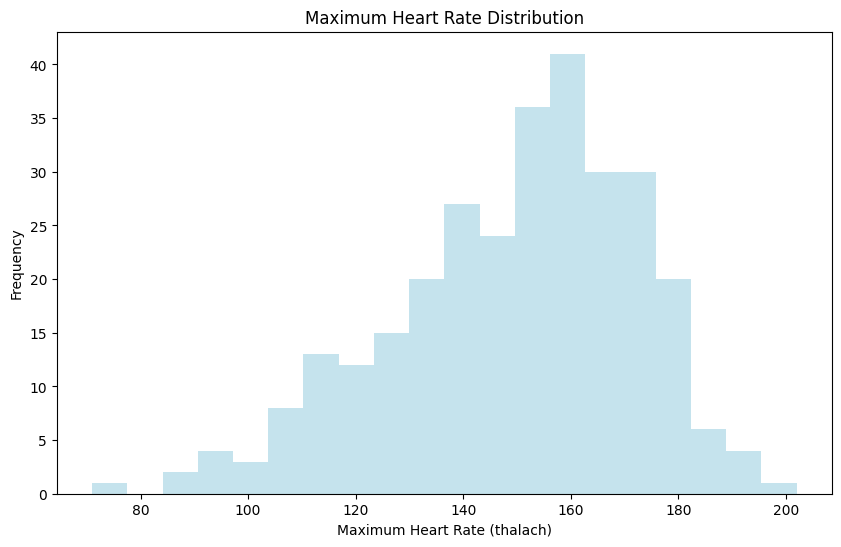

In [23]:
# Extract the 'thalach' column
thalach_col = df['thalach']

# Create a figure with specific size
plt.figure(figsize=(10, 6))

# Generate the histogram
plt.hist(thalach_col, bins=20, color='lightblue', alpha=0.7)

# Set labels and title
plt.xlabel('Maximum Heart Rate (thalach)')  # Informative label for thalach
plt.ylabel('Frequency')
plt.title('Maximum Heart Rate Distribution')

# Display the histogram
plt.show()

Visualizing ST Depression Distribution

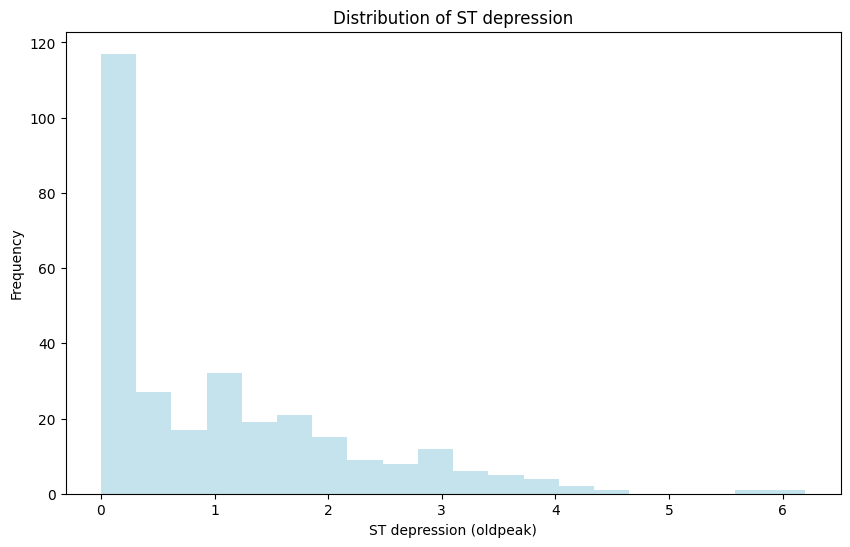

In [24]:
# Extract the 'oldpeak' column
oldpeak_col = df['oldpeak']

# Create a figure with specific size
plt.figure(figsize=(10, 6))

# Generate the histogram
plt.hist(oldpeak_col, bins=20, color='lightblue', alpha=0.7)

# Set labels and title
plt.xlabel('ST depression (oldpeak)') 
plt.ylabel('Frequency')
plt.title('Distribution of ST depression')

# Display the histogram
plt.show()

Visualizing Chest Pain Types, Age, and Health Conditions

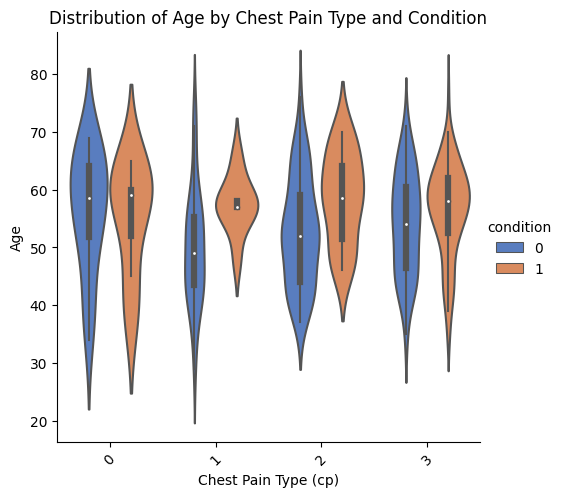

In [25]:
# Create a violin plot with hue
violinplt = sns.catplot(x='cp', y='age', hue='condition', data=df, kind="violin", palette="muted")

# Customize the plot (optional)
plt.xlabel("Chest Pain Type (cp)")  # Informative label for 'cp'
plt.ylabel("Age")
plt.title("Distribution of Age by Chest Pain Type and Condition")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed
plt.subplots_adjust(bottom=0.15)  # Adjust space for the legend

# Display the violinplot
plt.show()

Analyzing Fasting Blood Sugar Levels and Health Conditions

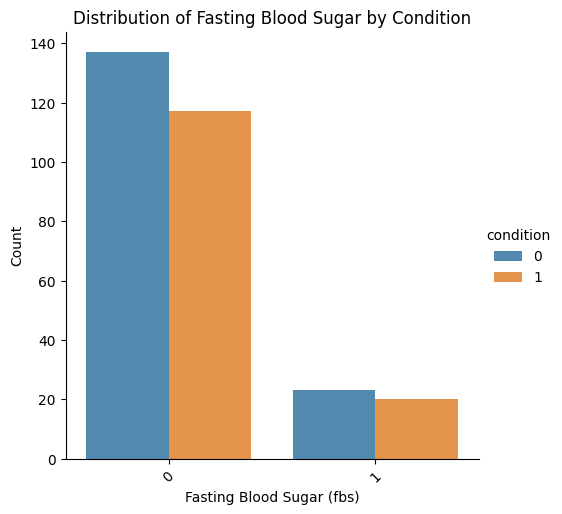

In [26]:
# Create a count plot with hue and transparency
countplt = sns.catplot(x='fbs', hue='condition', kind='count', data=df, alpha=0.85)

# Customize the plot (optional)
plt.xlabel("Fasting Blood Sugar (fbs)")  # Informative label for 'fbs'
plt.ylabel("Count")
plt.title("Distribution of Fasting Blood Sugar by Condition")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability if needed

# Display the countplot
plt.show()

Encoding Categorical Features

In [31]:
# categorical_cols = ['cp', 'thal', 'slope'] 

# # Encode categorical columns with ordinal encoding (assuming order exists)
# for col in categorical_cols:
#   # Replace with custom logic if categories have a specific order
#   df[col] = df[col].astype('category').cat.codes

# # Encoded DataFrame (preserves original data types)
# df_encoded = df.copy()

# # Check data types of encoded DataFrame
# print(df_encoded.dtypes)

In [29]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['cp', 'thal', 'slope']  

# Encode categorical columns with label encoding
for col in categorical_cols:
  # Create a label encoder
  le = LabelEncoder()
  # Fit the encoder on the unique categories
  le.fit(df[col].unique())
  # Transform the column using the fitted encoder
  df[col] = le.transform(df[col])

# Encoded DataFrame (preserves original data types)
df_encoded = df.copy()

# Check data types of encoded DataFrame
print(df_encoded.dtypes)

age            int64
sex           object
cp             int64
trestbps       int64
chol           int64
fbs           object
restecg       object
thalach        int64
exang         object
oldpeak      float64
slope          int64
ca            object
thal           int64
condition      int64
dtype: object


In [32]:
# categorical_cols = ['cp', 'thal', 'slope']  # Add or remove columns as needed

# # Encode categorical columns to integer type
# for col in categorical_cols:
#   df[col] = df[col].astype(int)  # Cast to integer

# # One-hot encode categorical columns
# df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix_sep='_', dtype=int)

# # Ensure all encoded columns are integer type
# df_encoded = df_encoded.astype(int)

# # Check data types of encoded DataFrame
# print(df_encoded.dtypes)

Preparing Features and Target Variable

In [33]:
x = df.drop('condition', axis=1)
y = df['condition']

Scaling Features

In [36]:
from sklearn.preprocessing import MinMaxScaler


# create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale x
x = scaler.fit_transform(x)

# Print the first few rows of scaled data 
print(x[:5])

[[0.83333333 1.         0.         0.62264151 0.24657534 1.
  1.         0.45801527 0.         0.01612903 0.5        0.33333333
  0.        ]
 [0.83333333 0.         0.         0.43396226 0.25799087 0.
  0.         0.61068702 0.         0.29032258 0.         0.66666667
  0.        ]
 [0.77083333 0.         0.         0.52830189 0.2283105  0.
  0.         0.32824427 0.         0.41935484 1.         0.
  0.        ]
 [0.75       1.         0.         0.41509434 0.35616438 1.
  1.         0.78625954 0.         0.22580645 0.5        0.33333333
  0.        ]
 [0.72916667 1.         0.         0.1509434  0.19406393 0.
  1.         0.55725191 1.         0.29032258 0.5        0.
  0.        ]]


Splitting the Data into Training and Testing Sets

In [37]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets (80%/20%)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=4)

# Print the shapes of training and testing sets (optional)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape) 

(237, 13) (60, 13) (237,) (60,)


In [61]:
x

array([[0.83333333, 1.        , 0.        , ..., 0.5       , 0.33333333,
        0.        ],
       [0.83333333, 0.        , 0.        , ..., 0.        , 0.66666667,
        0.        ],
       [0.77083333, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.125     , 1.        , 1.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.125     , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.125     , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ]])

Building and Evaluating Logistic Regression Model

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create a logistic regression model
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train, Y_train)

# Perform 10-fold cross-validation
lr_cv_results = cross_val_score(lr_model, X_train, Y_train, cv=10)

# Calculate mean cross-validation score (accuracy)
lr_mean_score = lr_cv_results.mean()
lr_mean_score = round(lr_mean_score, 4)

# Print the mean cross-validation score
print("Logistic Regression Mean CV Score:", lr_mean_score)

Logistic Regression Mean CV Score: 0.835


Building and Evaluating Linear Discriminant Analysis Model


In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an LDA model
ldr_model = LinearDiscriminantAnalysis()

# Fit the model to the training data
ldr_model.fit(X_train, Y_train)

# Perform 10-fold cross-validation
ldr_cv_results = cross_val_score(ldr_model, X_train, Y_train, cv=10)

# Calculate mean cross-validation score (accuracy)
ldr_mean_score = ldr_cv_results.mean()
ldr_mean_score = round(ldr_mean_score, 4)

# Print the mean cross-validation score
print("Linear Discriminant Analysis Mean CV Score:", ldr_mean_score)

Linear Discriminant Analysis Mean CV Score: 0.835


Building and Evaluating K-Nearest Neighbors (KNN) Model

In [46]:
from sklearn.neighbors import KNeighborsClassifier


# Create a KNN model
knn_model = KNeighborsClassifier()

# Fit the model to the training data
knn_model.fit(X_train, Y_train)

# Perform 10-fold cross-validation
knn_cv_results = cross_val_score(knn_model, X_train, Y_train, cv=10)

# Calculate mean and standard deviation of cross-validation scores
knn_mean_score = knn_cv_results.mean()
knn_mean_score = round(knn_mean_score, 4)
knn_std_score = knn_cv_results.std()
knn_std_score = round(knn_std_score, 4)

# Print the mean and standard deviation of cross-validation scores
print("KNN Mean CV Score:", knn_mean_score)
print("KNN Std CV Score:", knn_std_score)


KNN Mean CV Score: 0.7973
KNN Std CV Score: 0.0854


Building and Evaluating Decision Tree Classifier Model


In [48]:
from sklearn.tree import DecisionTreeClassifier


# Create a decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(X_train, Y_train)

# Perform 10-fold cross-validation
dt_cv_results = cross_val_score(dt_model, X_train, Y_train, cv=10)

# Calculate mean cross-validation score (accuracy)
dt_mean_score = dt_cv_results.mean()
dt_mean_score = round(dt_mean_score, 4)

# Print the mean cross-validation score
print("Decision Tree Mean CV Score:", dt_mean_score)


Decision Tree Mean CV Score: 0.7261


Building and Evaluating Gaussian Naive Bayes Model


In [49]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Fit the model to the training data
gnb_model.fit(X_train, Y_train)

# Perform 10-fold cross-validation
gnb_cv_results = cross_val_score(gnb_model, X_train, Y_train, cv=10)

# Calculate mean cross-validation score (accuracy)
gnb_mean_score = gnb_cv_results.mean()
gnb_mean_score = round(gnb_mean_score, 4)

# Print the mean cross-validation score
print("Gaussian Naive Bayes Mean CV Score:", gnb_mean_score)


Gaussian Naive Bayes Mean CV Score: 0.8312


Building and Evaluating Random Forest Classifier Model


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Assuming you have training data (X_train, Y_train) and defined num_trees and max_features

# Create a Random Forest classifier model
num_trees =100
max_features =3
rf_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

# Fit the model to the training data
rf_model.fit(X_train, Y_train)

# Perform 10-fold cross-validation
rf_cv_results = cross_val_score(rf_model, X_train, Y_train, cv=10)

# Calculate mean cross-validation score (accuracy)
rf_mean_score = rf_cv_results.mean()
rf_mean_score = round(rf_mean_score, 4)

# Print the mean cross-validation score
print("Random Forest Mean CV Score:", rf_mean_score)


Random Forest Mean CV Score: 0.8138


Building and Evaluating Support Vector Classifier (SVC) Model

In [51]:
from sklearn.svm import SVC

# Create an SVM classifier model
sv_model = SVC()  # Uses linear kernel by default

# Fit the model to the training data
sv_model.fit(X_train, Y_train)

# Perform 10-fold cross-validation
sv_cv_results = cross_val_score(sv_model, X_train, Y_train, cv=10)

# Calculate mean cross-validation score (accuracy)
sv_mean_score = sv_cv_results.mean()
sv_mean_score = round(sv_mean_score, 4)

# Print the mean cross-validation score
print("SVM Mean CV Score:", sv_mean_score)


SVM Mean CV Score: 0.8226


Evaluating Model Performance

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


best_model = gnb_model

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(Y_test, y_pred)

# Generate confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Generate classification report
cr = classification_report(Y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", cr)


Accuracy: 0.8166666666666667
Confusion Matrix:
 [[30  3]
 [ 8 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.86      0.70      0.78        27

    accuracy                           0.82        60
   macro avg       0.83      0.81      0.81        60
weighted avg       0.82      0.82      0.81        60



Making Predictions with Gaussian Naive Bayes Model

In [ ]:
Running Test case
------------- Test Case Failed -------------
Accuracy output is out of the expected range (0.75 - 0.81).
Something is wrong with the code
Note that Confusion Matrix and Classification Report values may differ slightly between the Outputs:
Your Output (Accuracy):
---------------------------------------------
0.8166666666666667
Your Output (Confusion Matrix):
---------------------------------------------
[[30 3]
[ 8 19]]
Your Output (Classification Report):
--------------------------------------------- precision recall f1-score support 0 0.79 0.91 0.85 33 1 0.86 0.70 0.78 27
accuracy 0.82 60
macro avg 0.83 0.81 0.81 60
weighted avg 0.82 0.82 0.81 60
Expected Output:
---------------------------------------------
0.75-0.810
[[30 3]
[ 8 19]] precision recall f1-score support 0 0.79 0.91 0.85 33 1 0.86 0.70 0.78 27
accuracy 0.82 60
macro avg 0.83 0.81 0.81 60
weighted avg 0.82 0.82 0.81 60



Making Predictions with Gaussian Naive Bayes Model

In [58]:
X_test.shape

(60, 13)

In [59]:
data.shape

AttributeError: 'list' object has no attribute 'shape'

In [62]:
data = [[0.254, 1, 0.487, 0.362,  ## age_scaled, sex, trestbps_scaled, chol
             1, 0.5, 0.641, 1,  ## fbs, restecg_scaled, thalach_scaled, exang
             0.672, 0.863,  ## oldpeak_scaled, ca_scaled, cp_0, cp_1
              1,   ## cp_2, cp_3, thal_0, thal_1
              1,  1]]  ## thal_2, thal_3, slope_0, slope_1, slope_2

# Make predictions for the sample data
prediction = gnb_model.predict(data)

# Print the prediction(s)
print("Prediction:", prediction)


Prediction: [1]
